In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:

df = pd.read_csv('in/zad3_xrd_5.txt', sep='\s+', decimal='.')
df

,t,u
0,20.000,0.0
1,20.010,0.0
2,20.020,0.0
3,20.030,0.0
4,20.040,0.0
...,...,...
6983,89.956,0.0
6984,89.966,0.0
6985,89.976,0.0
6986,89.986,0.0


x = 40.457 y = 75180.242
11087.729
20561.938
6320.149


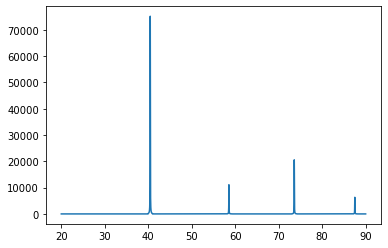

In [16]:
plt.plot(df['t'], df['u'])

max1_u = df[1500:3000]['u'].max()
max1_t = df['t'].loc[df['u'] == max1_u]
print("x =", max1_t.min(), "y =", max1_u)

max2 = df[3500:5000]['u'].max()
max1_t = df['t'].loc[df['u'] == max1_u]
print("x =", max1_t.min(), "y =", max1_u)

max3 = df[5000:6000]['u'].max()
print(max3)

max4 = df[6000:7000]['u'].max()
print(max4)